In [1]:
# Import Packages

import torch
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets.utils import download_url
from torchvision import transforms, datasets
from torchvision.models import resnet18
import torch.nn.functional as F
import numpy as np
import coremltools as ct

Torch version 2.3.0 has not been tested with coremltools. You may run into unexpected errors. Torch 2.1.0 is the most recent version that has been tested.


In [2]:
#Load saved model
model_new = torch.load('data_files/trained_models/imagenet_1.pt')


In [3]:
#Checking the requires_grad attribute of all the layers of the model 
for name, param in model_new.named_parameters():
    print(name, ':', param.requires_grad)

conv1.weight : True
bn1.weight : True
bn1.bias : True
layer1.0.conv1.weight : True
layer1.0.bn1.weight : True
layer1.0.bn1.bias : True
layer1.0.conv2.weight : True
layer1.0.bn2.weight : True
layer1.0.bn2.bias : True
layer1.1.conv1.weight : True
layer1.1.bn1.weight : True
layer1.1.bn1.bias : True
layer1.1.conv2.weight : True
layer1.1.bn2.weight : True
layer1.1.bn2.bias : True
layer2.0.conv1.weight : True
layer2.0.bn1.weight : True
layer2.0.bn1.bias : True
layer2.0.conv2.weight : True
layer2.0.bn2.weight : True
layer2.0.bn2.bias : True
layer2.0.downsample.0.weight : True
layer2.0.downsample.1.weight : True
layer2.0.downsample.1.bias : True
layer2.1.conv1.weight : True
layer2.1.bn1.weight : True
layer2.1.bn1.bias : True
layer2.1.conv2.weight : True
layer2.1.bn2.weight : True
layer2.1.bn2.bias : True
layer3.0.conv1.weight : True
layer3.0.bn1.weight : True
layer3.0.bn1.bias : True
layer3.0.conv2.weight : True
layer3.0.bn2.weight : True
layer3.0.bn2.bias : True
layer3.0.downsample.0.weight :

In [4]:
#Create Instance of the ResNet18 model (use jus torchload instead of state_dict, since we are loading the entire model, not just the weights.)
torch_model = torch.load('data_files/trained_models/imagenet_1.pt')

#Set the model to evaluation mode
torch_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
# Classes are labelled numerically, which is not helpful for us.
# We will assign the emperor name to the corresponding class label
path = 'data_files/resized_images'
dataset = datasets.ImageFolder(path)
print(dataset.class_to_idx)
class_dict = dataset.class_to_idx

{'AeliaFlacilla': 0, 'Agrippa': 1, 'Allectus': 2, 'AntoninusPius': 3, 'Arcadius': 4, 'Augustus': 5, 'Aurelian': 6, 'Caligula': 7, 'Caracalla': 8, 'Carausius': 9, 'Carinus': 10, 'Carus': 11, 'Claudius': 12, 'ClaudiusGothicus': 13, 'ClodiusAlbinus': 14, 'Commodus': 15, 'Constans': 16, 'ConstansII': 17, 'ConstantineI': 18, 'ConstantineII': 19, 'ConstantineIII': 20, 'ConstantiusChlorus': 21, 'ConstantiusGallus': 22, 'ConstantiusII': 23, 'Crispus': 24, 'Dalmatius': 25, 'Decentius': 26, 'Diadumenian': 27, 'Diocletian': 28, 'Domitian': 29, 'Elagabalus': 30, 'Eugenius': 31, 'FlaviusVictor': 32, 'Galba': 33, 'Galerius': 34, 'Gallienus': 35, 'Germanicus': 36, 'Geta': 37, 'GordianIII': 38, 'Gratian': 39, 'Hadrian': 40, 'Honorius': 41, 'Jovian': 42, 'Julian': 43, 'LeoI': 44, 'Licinius': 45, 'LiciniusII': 46, 'LuciusAeliusCaesar': 47, 'LuciusVerus': 48, 'Macrinus': 49, 'Magnentius': 50, 'MagnusMaximus': 51, 'Marcian': 52, 'MarcusAurelius': 53, 'Maxentius': 54, 'Maximian': 55, 'MaximinusDaia': 56, '

In [6]:
# Time to try out with a few random pictures from the internet

image = Image.open('data_files/test_coins/Marcus_Aurelius_Denarius2.jpg')
transform_train = transforms.Compose([transforms.Resize((300,300)), transforms.ToTensor()])
input = transform_train(image)

input = input.view(1, 3, 300,300)

output = torch_model(input)

prediction = int(torch.max(output.data, 1)[1].numpy())
emp = [k for k, v in class_dict.items() if v == int(prediction)]
print(emp)

['MarcusAurelius']


/var/folders/z1/p_2hhfy51r7b7x1ld79_c4cr0000gn/T/ipykernel_13317/525252708.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(torch.max(output.data, 1)[1].numpy())


In [7]:
image = Image.open('data_files/test_coins/Traja_test_coin.jpg')
transform_train = transforms.Compose([transforms.Resize((300,300)), transforms.ToTensor()])
input = transform_train(image)

input = input.view(1, 3, 300,300)

output = torch_model(input)

prediction = int(torch.max(output.data, 1)[1].numpy())
emp = [k for k, v in class_dict.items() if v == int(prediction)]
print(emp)

['Trajan']


/var/folders/z1/p_2hhfy51r7b7x1ld79_c4cr0000gn/T/ipykernel_13317/1360588380.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(torch.max(output.data, 1)[1].numpy())


In [8]:
image = Image.open('data_files/test_coins/constantius_second.jpg')
transform_train = transforms.Compose([transforms.Resize((300,300)), transforms.ToTensor()])
input = transform_train(image)

input = input.view(1, 3, 300,300)

output = torch_model(input)

prediction = int(torch.max(output.data, 1)[1].numpy())
emp = [k for k, v in class_dict.items() if v == int(prediction)]
print(emp)

['ConstantiusII']


/var/folders/z1/p_2hhfy51r7b7x1ld79_c4cr0000gn/T/ipykernel_13317/2619239288.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(torch.max(output.data, 1)[1].numpy())


In [9]:
image = Image.open('data_files/test_coins/unknown.jpg')
transform_train = transforms.Compose([transforms.Resize((300,300)), transforms.ToTensor()])
input = transform_train(image)

input = input.view(1, 3, 300,300)

output = torch_model(input)

prediction = int(torch.max(output.data, 1)[1].numpy())
emp = [k for k, v in class_dict.items() if v == int(prediction)]
print(emp)

['Domitian']


/var/folders/z1/p_2hhfy51r7b7x1ld79_c4cr0000gn/T/ipykernel_13317/2975202183.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(torch.max(output.data, 1)[1].numpy())


In [10]:
image = Image.open('data_files/test_coins/Hadrian-Gold-Coin.jpg')
transform_train = transforms.Compose([transforms.Resize((300,300)), transforms.ToTensor()])
input = transform_train(image)

input = input.view(1, 3, 300,300)

output = torch_model(input)

prediction = int(torch.max(output.data, 1)[1].numpy())
emp = [k for k, v in class_dict.items() if v == int(prediction)]
print(emp)

['Hadrian']


/var/folders/z1/p_2hhfy51r7b7x1ld79_c4cr0000gn/T/ipykernel_13317/3325595696.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(torch.max(output.data, 1)[1].numpy())


In [11]:
image = Image.open('data_files/test_coins/augustus.jpg')
transform_train = transforms.Compose([transforms.Resize((300,300)), transforms.ToTensor()])
input = transform_train(image)

input = input.view(1, 3, 300,300)

output = torch_model(input)

prediction = int(torch.max(output.data, 1)[1].numpy())
emp = [k for k, v in class_dict.items() if v == int(prediction)]
print(emp)

['Augustus']


/var/folders/z1/p_2hhfy51r7b7x1ld79_c4cr0000gn/T/ipykernel_13317/75388374.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(torch.max(output.data, 1)[1].numpy())


In [12]:
image = Image.open('/Users/davidal-gurnawi/Documents/data_science/coins/test_coins/antoninus_pius_2.jpg')
transform_train = transforms.Compose([transforms.Resize((300,300)), transforms.ToTensor()])
input = transform_train(image)

input = input.view(1, 3, 300,300)

output = torch_model(input)

prediction = int(torch.max(output.data, 1)[1].numpy())
emp = [k for k, v in class_dict.items() if v == int(prediction)]
print(emp)

['AntoninusPius']


/var/folders/z1/p_2hhfy51r7b7x1ld79_c4cr0000gn/T/ipykernel_13317/3133833726.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(torch.max(output.data, 1)[1].numpy())


In [13]:
# Optimise for mobile.
# In order to use the model for an ios mobile application, we will have to use CoreML to change it to a iOS compatible format.


In [14]:
# Trace the model with random data.
# Values are ot important here, just the correct shape
img_path = "data_files/test_coins/augustus.jpg"
img = Image.open(img_path)
img = img.resize([300, 300])

#example = torch.rand(1,3,300,300)
transform = transforms.Compose([transforms.ToTensor()])
example_tensor = transform(img)
example = example_tensor.unsqueeze(0) # Add batch dimension

traced_model = torch.jit.trace(torch_model, example)
out = traced_model(example)

In [15]:
#Saving class labels
#text_file = open("/Users/davidal-gurnawi/Documents/data_science/coins/trained_models/words.txt")
#class_labels = text_file.read().splitlines()
class_labels= list(class_dict.keys())

class_labels

['AeliaFlacilla',
 'Agrippa',
 'Allectus',
 'AntoninusPius',
 'Arcadius',
 'Augustus',
 'Aurelian',
 'Caligula',
 'Caracalla',
 'Carausius',
 'Carinus',
 'Carus',
 'Claudius',
 'ClaudiusGothicus',
 'ClodiusAlbinus',
 'Commodus',
 'Constans',
 'ConstansII',
 'ConstantineI',
 'ConstantineII',
 'ConstantineIII',
 'ConstantiusChlorus',
 'ConstantiusGallus',
 'ConstantiusII',
 'Crispus',
 'Dalmatius',
 'Decentius',
 'Diadumenian',
 'Diocletian',
 'Domitian',
 'Elagabalus',
 'Eugenius',
 'FlaviusVictor',
 'Galba',
 'Galerius',
 'Gallienus',
 'Germanicus',
 'Geta',
 'GordianIII',
 'Gratian',
 'Hadrian',
 'Honorius',
 'Jovian',
 'Julian',
 'LeoI',
 'Licinius',
 'LiciniusII',
 'LuciusAeliusCaesar',
 'LuciusVerus',
 'Macrinus',
 'Magnentius',
 'MagnusMaximus',
 'Marcian',
 'MarcusAurelius',
 'Maxentius',
 'Maximian',
 'MaximinusDaia',
 'MaximinusI',
 'Maximus',
 'Nero',
 'Nerva',
 'Numerian',
 'PescenniusNiger',
 'PhilipII',
 'PhiliptheArab',
 'Postumus',
 'Probus',
 'Quintillus',
 'Romulus',
 '

In [16]:
# Set the image scale and bias for input image preprocessing.
scale = 1/(0.95*255.0)
bias = [0.75, 0.75, 0.75]
image_input = ct.ImageType(name="image_input",
                           shape=example.shape, scale = scale, bias = bias, channel_first=True
                           )

In [17]:
# Using image_input in the inputs parameter:
# Convert to Core ML using the Unified Conversion API.
model = ct.convert(
    traced_model,
    inputs=[image_input],
    classifier_config = ct.ClassifierConfig(class_labels),
    compute_units=ct.ComputeUnit.CPU_ONLY,
)

When both 'convert_to' and 'minimum_deployment_target' not specified, 'convert_to' is set to "mlprogram" and 'minimum_deployment_targer' is set to ct.target.iOS15 (which is same as ct.target.macOS12). Note: the model will not run on systems older than iOS15/macOS12/watchOS8/tvOS15. In order to make your model run on older system, please set the 'minimum_deployment_target' to iOS14/iOS13. Details please see the link: https://coremltools.readme.io/docs/unified-conversion-api#target-conversion-formats
Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 2620.62 passes/s]


In [19]:
# Add metadata
model.author = "David Al-Gurnawi"
model.license = "MIT 2.0"
model.short_description = "CNN Model to identify the Roman emperor based on the face side of a coin"
model.version = "1.0"

In [ ]:
# Save the converted model.
model.save("data_files/trained_models/imperium_final.mlpackage")
# Print a confirmation message.
print('model converted and saved')

model converted and saved


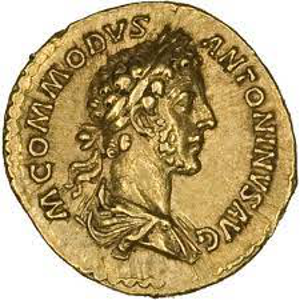

In [ ]:
# Load the test image and resize to 300,300.
img_path = "data_files/test_coins/commodus.jpg"
img = Image.open(img_path)
img = img.resize([300, 300])
img

In [ ]:
# Get the protobuf spec of the model.
spec = model.get_spec()
for out in spec.description.output:
    if out.type.WhichOneof('Type') == "dictionaryType":
        coreml_dict_name = out.name
        break

In [ ]:
# Make a prediction with the Core ML version of the model.
coreml_out_dict = model.predict({"image_input" : img})
print("coreml predictions: ")
print("top class label: ", coreml_out_dict["classLabel"])

coreml_prob_dict = coreml_out_dict[coreml_dict_name]

values_vector = np.array(list(coreml_prob_dict.values()))
keys_vector = list(coreml_prob_dict.keys())
top_3_indices_coreml = np.argsort(-values_vector)[:3]
for i in range(3):
    idx = top_3_indices_coreml[i]
    score_value = values_vector[idx]
    class_id = keys_vector[idx]
    print("class name: {}, raw score value: {}".format(class_id, score_value))

coreml predictions: 
top class label:  Commodus
class name: Commodus, raw score value: 21.109375
class name: Caracalla, raw score value: 13.7890625
class name: Domitian, raw score value: 11.796875
